In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib

# Loading Dataset

In [9]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [10]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2424,42,1,True,False,True,Shahran,1.750000e+09,58333.33
3387,65,1,False,True,False,Republic,1.400000e+09,46666.67
2741,38,1,True,True,False,Fallah,6.500000e+08,21666.67
2288,40,1,True,True,False,Narmak,1.250000e+09,41666.67
2207,58,2,False,True,False,Jeyhoon,1.210000e+09,40333.33


In [11]:
df.shape

(3479, 8)

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
# drop the USD price column
df = df.drop("Price(USD)", axis="columns")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   object 
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   bool   
 3   Warehouse  3479 non-null   bool   
 4   Elevator   3479 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   float64
dtypes: bool(3), float64(1), int64(1), object(2)
memory usage: 119.0+ KB


In [15]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [16]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


In [17]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   int64  
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   bool   
 3   Warehouse  3479 non-null   bool   
 4   Elevator   3479 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 119.0+ KB


In [19]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [20]:
# I want to drop missing values
df.dropna(inplace=True)

In [21]:
df.shape

(3456, 7)

In [22]:
df["Parking"].value_counts(normalize=True)*100

Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64

In [23]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [24]:
df.groupby('Room')['Price'].mean()

Room
0    7.860500e+09
1    1.707481e+09
2    3.330303e+09
3    1.093869e+10
4    2.560033e+10
5    3.373439e+10
Name: Price, dtype: float64

In [25]:
df2 = df.copy()

df2.loc[:, 'Price'] = df['Price'].map('{:,.0f}'.format)

In [26]:
df2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,"1,850,000,000"
1,60,1,True,True,True,Shahran,"1,850,000,000"
2,79,2,True,True,True,Pardis,"550,000,000"
3,95,2,True,True,True,Shahrake Qods,"902,500,000"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000"


# Visualization

<Figure size 800x500 with 0 Axes>

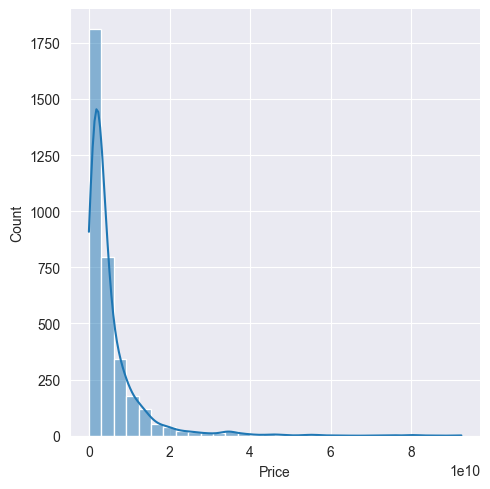

In [27]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'], bins= 30, kde= True)

<Axes: >

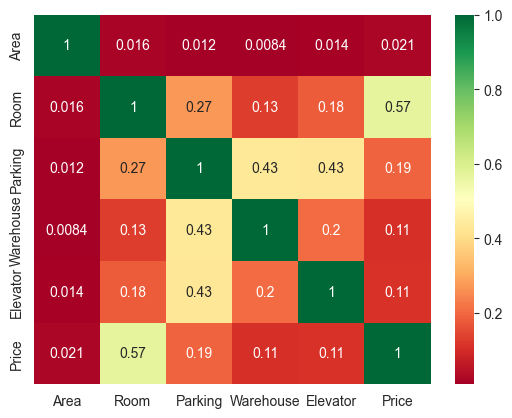

In [28]:
sns.heatmap(df.select_dtypes(include=[float,int,bool]).corr(), annot=True, cmap='RdYlGn')

In [29]:
df.sort_values('Price', ascending=False)[["Address"]].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# Preprocess

In [30]:
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64

In [31]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1.850000e+09
1,60,1,True,True,True,Shahran,1.850000e+09
2,79,2,True,True,True,Pardis,5.500000e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09
3475,83,2,True,True,True,Niavaran,6.800000e+09
3476,75,2,False,False,False,Parand,3.650000e+08
3477,105,2,True,True,True,Dorous,5.600000e+09


In [32]:
df.shape

(3456, 7)

In [35]:
boolean_features = ['Parking', 'Warehouse', 'Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1.850000e+09
1,60,1,1,1,1,Shahran,1.850000e+09
2,79,2,1,1,1,Pardis,5.500000e+08
3,95,2,1,1,1,Shahrake Qods,9.025000e+08
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09


In [37]:
print(f"Skewness of features:\n{df.select_dtypes(include=['number']).skew()}")

Skewness of features:
Area         43.827765
Room          0.623938
Parking      -1.934179
Warehouse    -2.975864
Elevator     -1.404947
Price         4.765172
dtype: float64


In [38]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

lowe_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])


In [39]:
area_outliers = np.where(df["Area"] > upper_area)
price_outliers = np.where(df["Price"] > lower_price)

total_outliers = np.union1d(area_outliers, price_outliers)


In [40]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index=True, right_index=True)
df_final.drop('Address', axis='columns', inplace=True)
df_final.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1.850000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1.850000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,5.500000e+08,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,9.025000e+08,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,7.000000e+09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df_final.replace({False: 0, True: 1}, inplace=True)

In [43]:
df_final.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,5.500000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,9.025000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7.000000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = df_final.drop('Price', axis=1)
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"shape of x_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of x_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of x_train: (2764, 197)
shape of y_train: (2764,)
shape of x_test: (692, 197)
shape of y_test: (692,)


In [45]:
def parameter_finder(model, parameters):
    
    start = time.time()
    grid = GridSearchCV(estimator=model, param_grid=parameters, refit=True
                         ,cv= KFold(shuffle=True, random_state=1), n_jobs= -1)
    
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score = grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print('**'*10)
    print(f"(R2score) in the training set is : {train_score:0.2%} for {model_name} model")
    print(f"(R2score) in the test set is : {test_score:0.2%} for {model_name} model")
    print(f"RMSE is : {RMSE:,} for {model_name} model")
    print("**"*10)
    print(f"Runtime of the program is {end-start:.2f} seconds")
    
    return train_score, test_score, RMSE

In [46]:
lr = LinearRegression(n_jobs=-1)

lr_train, lr_test, lr_RSME = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
********************
(R2score) in the training set is : 60.40% for LinearRegression model
(R2score) in the test set is : 53.35% for LinearRegression model
RMSE is : 6,357,973,679.037212 for LinearRegression model
********************
Runtime of the program is 1.60 seconds


In [47]:
ridge = Ridge(random_state=0)
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

ridge_train, ridge_test, ridge_RSME = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 0.001}
********************
(R2score) in the training set is : 60.40% for Ridge model
(R2score) in the test set is : 53.36% for Ridge model
RMSE is : 6,357,553,945.625064 for Ridge model
********************
Runtime of the program is 1.57 seconds


In [48]:
lasso = Lasso(random_state=0)
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso_train, lasso_test, lasso_RSME = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
********************
(R2score) in the training set is : 60.40% for Lasso model
(R2score) in the test set is : 53.35% for Lasso model
RMSE is : 6,357,953,517.829563 for Lasso model
********************
Runtime of the program is 3.22 seconds


In [49]:
eln = ElasticNet(random_state=0)
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'l1_ratio': [0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

eln_train, eln_test, eln_RSME = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 1.0}
********************
(R2score) in the training set is : 60.40% for ElasticNet model
(R2score) in the test set is : 53.35% for ElasticNet model
RMSE is : 6,357,953,517.829563 for ElasticNet model
********************
Runtime of the program is 10.18 seconds


In [50]:
knr = KNeighborsRegressor(n_jobs=-1)
param_knr = {'n_neighbors': [5, 10, 15, 20], 'weights': ['uniform', 'distance']}

knr_train, knr_test, knr_RSME = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
********************
(R2score) in the training set is : 60.39% for KNeighborsRegressor model
(R2score) in the test set is : 63.99% for KNeighborsRegressor model
RMSE is : 5,586,254,776.237762 for KNeighborsRegressor model
********************
Runtime of the program is 1.17 seconds


In [53]:
xgb = XGBRegressor(n_jobs=-1)
param_xgb = {'n_estimators': [100, 300, 500, 1000],
             'learning_rate': [0.2, 0.1, 0.05],
             'subsample': [0.7],
             'colsample_bytree': [1],
             'max_depth': [3, 4, 5, 6],
             'gamma': [0],}

xgb_train, xgb_test, xgb_RSME = parameter_finder(xgb, param_xgb)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.7}
********************
(R2score) in the training set is : 96.54% for XGBRegressor model
(R2score) in the test set is : 77.24% for XGBRegressor model
RMSE is : 4,441,080,958.083094 for XGBRegressor model
********************
Runtime of the program is 62.02 seconds
